In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from sklearn.metrics import confusion_matrix
import itertools
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
import os

real = "C:/machine/proj2/real/"
fake = "C:/machine/proj2/fake/"
datadir = "C:/machine/proj2/"



real_path = os.listdir(real)
fake_path = os.listdir(fake)


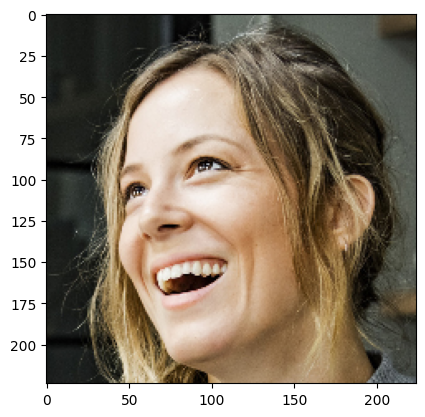

In [5]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (224, 224))
#     print(labels)
    return image[...,::-1]


import matplotlib.pyplot as plt
import cv2
plt.imshow(load_img(real + real_path[2]), cmap='gray')

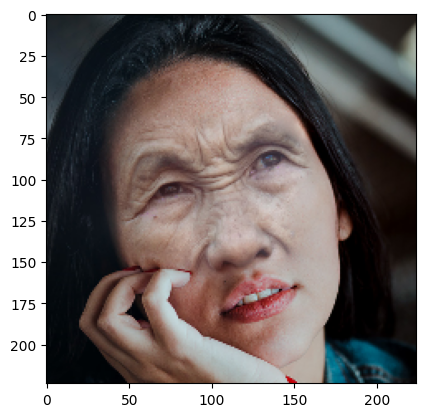

In [6]:
plt.imshow(load_img(fake + fake_path[59]), cmap='gray')

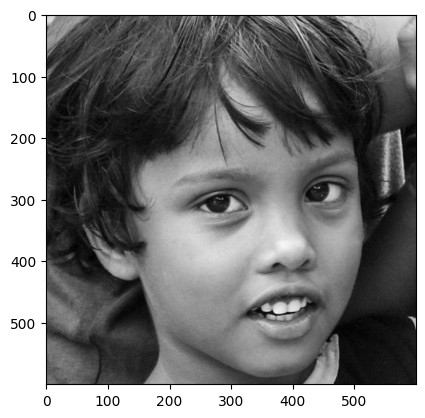

real


In [7]:
categories = ["real" , "fake"]

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        print(category)
        break
    break

# Создадим training_data


In [8]:
training_data = []
IMG_SIZE = 224

##Реальное лицо - 0, сгенерированное -1.

categories = ["real" , "fake"]

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num])
            except:
                pass
create_training_data()
training_data = np.asarray(training_data, dtype="object")
print(training_data.shape)

(501, 2)


In [9]:
import random

np.random.shuffle(training_data)
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)
X = X/255.0
print(X.shape)
print(y.shape)

(501, 224, 224, 3)
(501,)


# Тренировка модели

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of test_x: ",X_train.shape)
print("Shape of train_y: ",y_train.shape)
print("Shape of test_x: ",X_test.shape)
print("Shape of test_y: ",y_test.shape)

Shape of test_x:  (400, 224, 224, 3)
Shape of train_y:  (400,)
Shape of test_x:  (101, 224, 224, 3)
Shape of test_y:  (101,)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

train_x = tf.keras.utils.normalize(X_train,axis=1)
test_x = tf.keras.utils.normalize(X_test, axis=1)

In [12]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',
                            input_shape= X.shape[1:]),
            tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
            tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(2, activation=tf.nn.softmax)

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train,y_train, batch_size=20, epochs = 5, validation_split=0.1)

C:\Users\Ирина\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.5070 - loss: 2.1617 - val_accuracy: 0.5250 - val_loss: 0.6961
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - accuracy: 0.5456 - loss: 0.6874 - val_accuracy: 0.5000 - val_loss: 0.7005
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.5303 - loss: 0.6923 - val_accuracy: 0.4750 - val_loss: 0.7028
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.5472 - loss: 0.6861 - val_accuracy: 0.4500 - val_loss: 0.7155
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - accuracy: 0.5358 - loss: 0.6913 - val_accuracy: 0.4250 - val_loss: 0.7385


In [14]:
# predictions
predictions = model.predict(X_test)
print(predictions[10:20])
rounded_predictions=np.argmax(predictions,axis=1)
# classes_x=np.argmax(predictions,axis=1)
# rounded_predictions = (model.predict(X_test) > 0.5).astype("int32")
for i in rounded_predictions[10:20]:
    print(i)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 549ms/step
[[0.4773336  0.52266634]
 [0.40936157 0.59063846]
 [0.5248901  0.47510985]
 [0.33551756 0.6644824 ]
 [0.45500898 0.544991  ]
 [0.43075436 0.5692456 ]
 [0.51228005 0.48772   ]
 [0.31815684 0.6818432 ]
 [0.31556836 0.6844317 ]
 [0.6094616  0.39053842]]
1
1
0
1
1
1
0
1
1
0


# Матрица совпадений

Confusion matrix, without normalization
[[15 43]
 [ 6 37]]


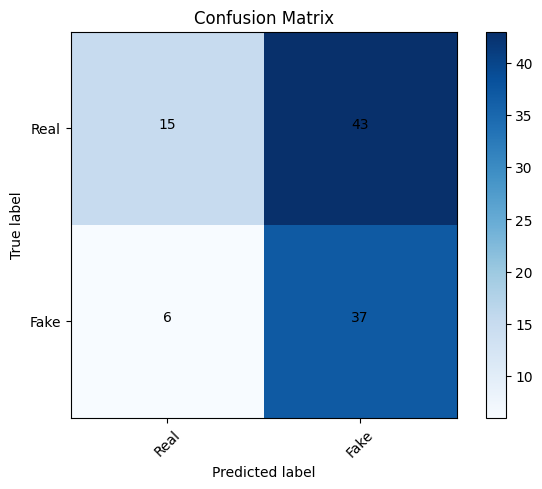

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,rounded_predictions)

def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm_plot_labels = ['Real', 'Fake']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Сравним с VGG

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.4982 - loss: 1.0405 - val_accuracy: 0.5250 - val_loss: 0.8189
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.5701 - loss: 0.7319 - val_accuracy: 0.5750 - val_loss: 0.6958
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.5710 - loss: 0.6866 - val_accuracy: 0.4500 - val_loss: 0.7376
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.5721 - loss: 0.6740 - val_accuracy: 0.5250 - val_loss: 0.8209
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.5243 - loss: 0.7710 - val_accuracy: 0.5000 - val_loss: 0.7172
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.5619 - loss: 0.6872 - val_accuracy: 0.4750 - val_loss: 0.8330
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.5777 - loss: 0.7146 - val_accuracy: 0.4500 - val_loss: 0.7177
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.5926 - loss: 0.7137 - val_accuracy: 0.4750 - val_loss:

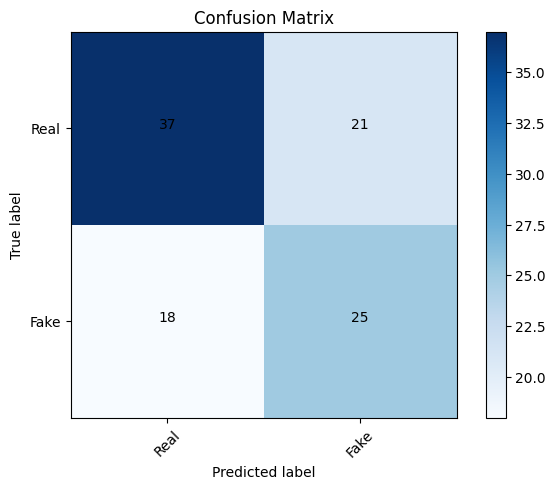

In [18]:
vgg16_model = keras.applications.vgg16.VGG16()
from keras.models import Sequential

model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
    
for layer in model.layers:
    layer.trainable = False
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train,y_train, batch_size=20, epochs = 20, validation_split=0.1)

predictions = model.predict(X_test)
rounded_prediction = np.argmax(predictions,axis=1)
cm = confusion_matrix(y_test,rounded_prediction)
cm_plot_labels = ['Real', 'Fake']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Сравним предсказания и реальные категории некоторых фото


In [19]:
## For Image Display.
def load_img(path):
    image = cv2.resize(path, (224, 224))
    return image[...,::-1]

## For Predicting result.
def prepare(image):
    IMG_SIZE = 224
    new_array = cv2.resize(image, (IMG_SIZE, IMG_SIZE)) 
    return new_array.reshape(-1, IMG_SIZE,IMG_SIZE,3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
Probabilities:  [[0.23825215 0.76174784]]
Actual:  Fake-Face
Prediction:  Fake-Face


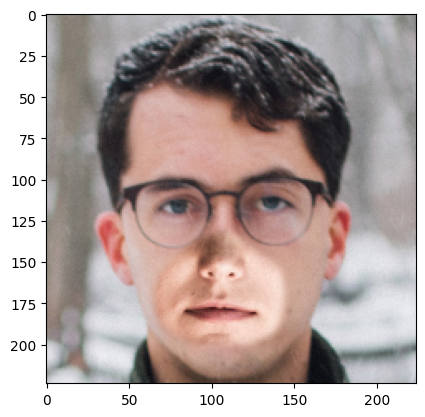

In [21]:
n = 13

prediction = model.predict(prepare(X_test[n]))
print("Probabilities: ",prediction)

x = ["Real-Face" if y_test[n]== 0 else "Fake-Face"]
print("Actual: ",x[0])
rounded_prediction =np.argmax(prediction,axis=1)
y = ["Real-Face" if rounded_prediction[0]== 0 else "Fake-Face"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
Probabilities:  [[0.5124154  0.48758462]]
Actual:  Real-Face
Prediction:  Real-Face


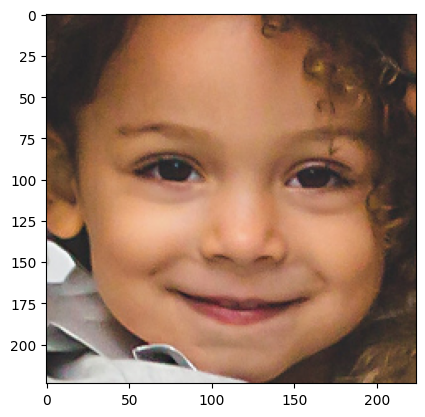

In [22]:
n = 27

prediction = model.predict(prepare(X_test[n]))
print("Probabilities: ",prediction)
x = ["Real-Face" if y_test[n]== 0 else "Fake-Face"]
print("Actual: ",x[0])
rounded_prediction=np.argmax(predictions,axis=1)
y = ["Real-Face" if rounded_prediction[0]== 0 else "Fake-Face"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
Probabilities:  [[0.31673446 0.6832655 ]]
Actual:  Fake-Face
Prediction:  Real-Face


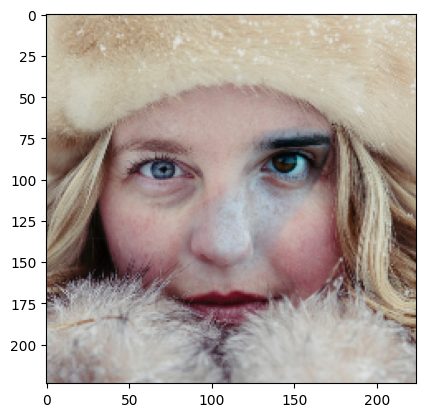

In [25]:
n = 93

prediction = model.predict(prepare(X_test[n]))
print("Probabilities: ",prediction)
x = ["Real-Face" if y_test[n]== 0 else "Fake-Face"]
print("Actual: ",x[0])
rounded_prediction=np.argmax(predictions,axis=1)
y = ["Real-Face" if rounded_prediction[0]== 0 else "Fake-Face"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()